In [1]:
def calc_avg_clients_metrics(clients_metrics):
    avg_acc = 0
    avg_prec = 0
    avg_rec = 0
    avg_fscore = 0
    avg_loss = 0

    for client_metrics in clients_metrics:
        avg_acc += client_metrics["accuracy"]
        avg_prec += client_metrics["precision"]
        avg_rec += client_metrics["recall"]
        avg_fscore += client_metrics["f1"]
        avg_loss += client_metrics["loss"]
    
    nr_clients = len(clients_metrics)
    avg_acc /= nr_clients
    avg_prec /= nr_clients
    avg_rec /= nr_clients
    avg_fscore /= nr_clients
    avg_loss /= nr_clients

    return {
        'average_accuracy': avg_acc,
        'average_precision': avg_prec,
        'average_recall': avg_rec,
        'average_fscore': avg_fscore,
        'average_loss': avg_loss,
    }

# Plot dataset

{'digit': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], 'count': [5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]}


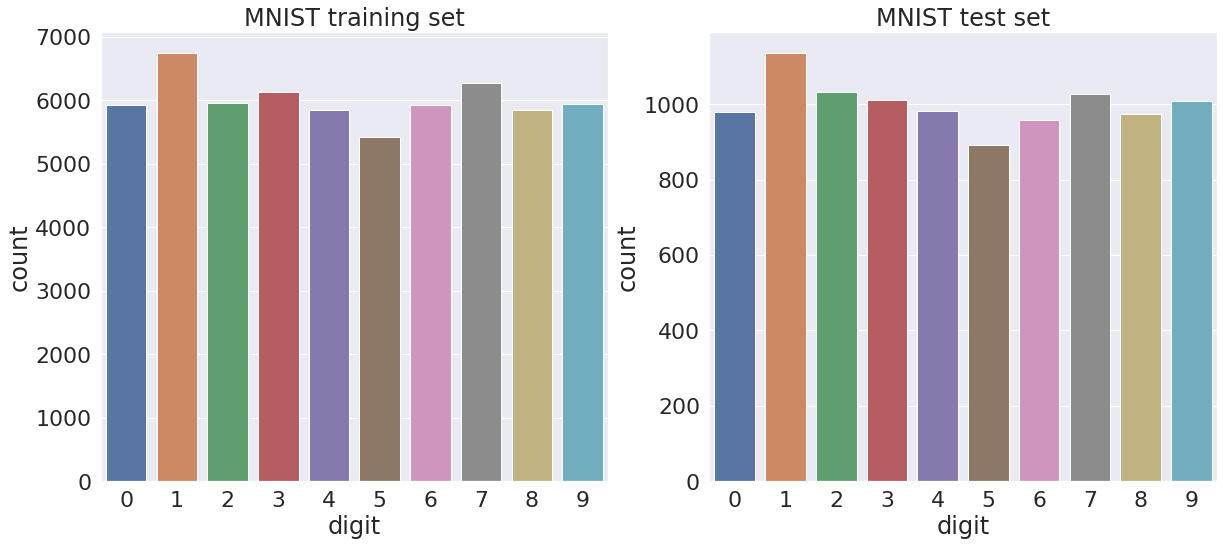

In [5]:
from torchvision import datasets, transforms
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

sns.set(rc={'figure.figsize':(20,8.27)})
sns.set(font_scale=2)  # crazy big

transform=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
    ])

dataset = datasets.MNIST('../data', train=True, download=True,
                       transform=transform)

fig, ax = plt.subplots(1,2)

nmbrs_count = {'digit': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], 'count': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}
for nmbr in dataset.targets.numpy():
    nmbrs_count['count'][nmbr] += 1

print(nmbrs_count)
df_train = pd.DataFrame(nmbrs_count)
sns.barplot(x='digit', y="count", data=df_train, ax=ax[0]).set_title('MNIST training set')
plt.legend([],[], frameon=False)

dataset = datasets.MNIST('../data', train=False, download=True,
                       transform=transform)

nmbrs_count = {'digit': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], 'count': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}
for nmbr in dataset.targets.numpy():
    nmbrs_count['count'][nmbr] += 1
df_test = pd.DataFrame(nmbrs_count)
sns.barplot(x='Digit', y="Cunt", data=df_test, ax=ax[1]).set_title('MNIST test set')

fig.savefig("res.png")


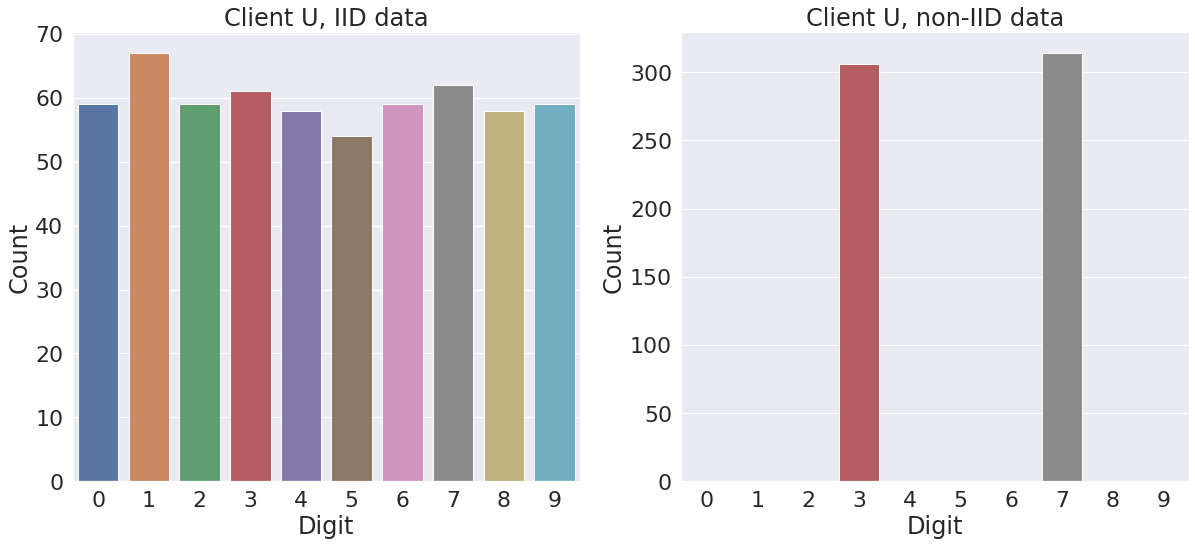

In [9]:
from torchvision import datasets, transforms
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

sns.set(rc={'figure.figsize':(20,8.27)})
sns.set(font_scale=2)  # crazy big

transform=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
    ])

dataset = datasets.MNIST('../data', train=True, download=True,
                       transform=transform)

fig, ax = plt.subplots(1,2)

nmbrs_count = {'Digit': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], 'Count': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}
total = [5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]

for nmbr in range(10):
    nmbrs_count['Count'][nmbr] = total[nmbr]//100


df_train = pd.DataFrame(nmbrs_count)
sns.barplot(x='Digit', y="Count", data=df_train, ax=ax[0]).set_title('Client U, IID data')
plt.legend([],[], frameon=False)

dataset = datasets.MNIST('../data', train=False, download=True,
                       transform=transform)

nmbrs_count = {'Digit': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], 'Count': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}
nmbrs_count['Count'][7] = 314
nmbrs_count['Count'][3] = 306

df_test = pd.DataFrame(nmbrs_count)
sns.barplot(x='Digit', y="Count", data=df_test, ax=ax[1]).set_title('Client U, non-IID data')

fig.savefig("res2.png")


Counter({2: 127, 1: 121, 7: 108, 4: 99, 8: 97, 9: 96, 0: 92, 6: 92, 3: 86, 5: 82})


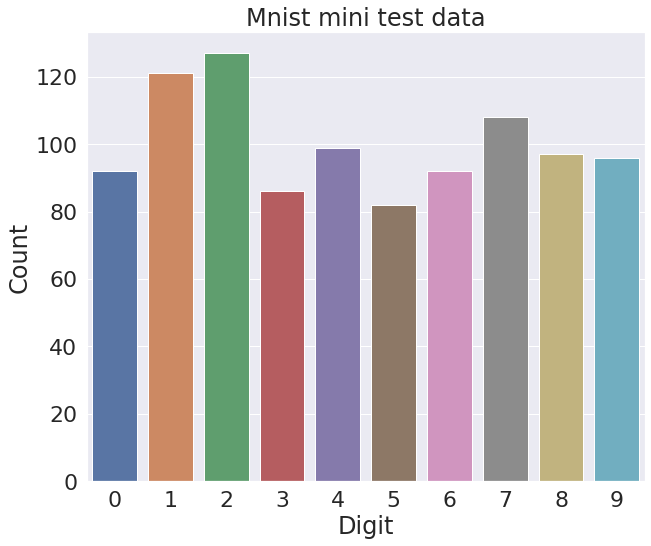

In [24]:
from torchvision import datasets, transforms
import torch
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

torch.manual_seed(1)
random.seed(1)

sns.set_theme(style="darkgrid")

sns.set(rc={'figure.figsize':(10,8.27)})
sns.set(font_scale=2)  # crazy big

transform=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
    ])

dataset = datasets.MNIST('../data', train=False, download=True,
                       transform=transform)

_, test_set = torch.utils.data.random_split(dataset, [9000, 1000])


test_classes = [label for _, label in test_set]
print(Counter(test_classes))
#test_loader_mini = torch.utils.data.DataLoader(test_set, **test_kwargs)

#fig, ax = plt.subplots(1,2)

nmbrs_count = {'Digit': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], 'Count': [92, 121, 127, 86, 99, 82, 92, 108, 97, 96]}


df_train = pd.DataFrame(nmbrs_count)
sns.barplot(x='Digit', y="Count", data=df_train).set_title('Mnist mini test data')
plt.legend([],[], frameon=False)

fig.savefig("minitest.png")


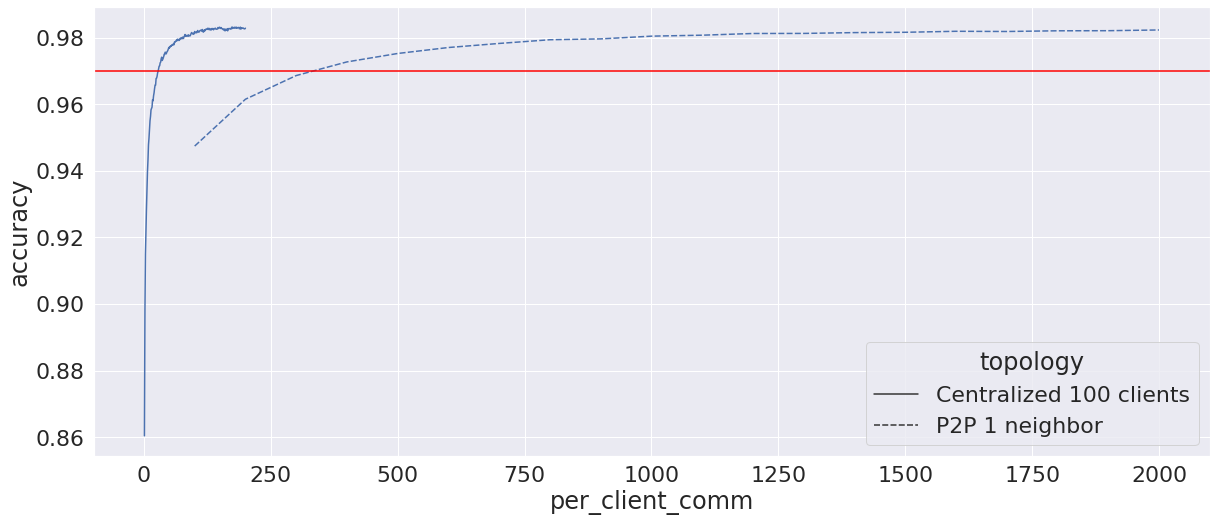

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
#sns.set_theme(style="darkgrid")

### OPEN P2P
nr_clients = 100 ### NUMBER OF CLIENTS/ENTITIES
C = 10  ### number of clients in each round, [1, nr_clients]
client_epochs = 1   # Number of client epochs
communication_rounds = 200  # Number of maximum communication rounds
test_every_x_round = 10

dir_str = '{}_{}_{}_{}_{}/'.format(nr_clients, C, client_epochs, communication_rounds, test_every_x_round)
path = './Results/P2P/' + dir_str

with open(path + 'metrics', 'rb') as metrics_file:
    metrics_p2p = pickle.load(metrics_file)

# per node communication
# C*nr_clients*round
# 

avgs =  [calc_avg_clients_metrics(metrics_p2p[0][i]) for i in range(communication_rounds//test_every_x_round)]
df_p2p = pd.DataFrame(avgs)
comm_round = [i-1 for i in range(10,210,10)]
per_client_comm = [C*i for i in range(10, 210, 10)]

# 0 indexed
df_p2p['comm_round'] = comm_round
df_p2p['per_client_comm'] = per_client_comm
# change columns to match centralized
df_p2p.columns = ['accuracy', 'precision', 'recall', 'f1','loss', 'comm_round', 'per_client_comm']

### OPEN CENTRALIZED
nr_clients = 100 ### NUMBER OF CLIENTS/ENTITIES
C = 100  ### number of clients in each round, [1, nr_clients]
client_epochs = 1   ### Number of client epochs
communication_rounds = 200  ### Number of maximum communication rounds
test_every_x_round = 1

dir_str = '{}_{}_{}_{}_{}/'.format(nr_clients, C, client_epochs, communication_rounds, test_every_x_round)
path = './Results/Fedavg/' + dir_str

with open(path + 'metrics', 'rb') as metrics_file:
    metrics = pickle.load(metrics_file)

df = pd.DataFrame.from_dict(metrics[0])
df.drop(columns=["classification_report"])
df["comm_round"] = [i for i in range(200)]
df['per_client_comm'] = [i+1 for i in range(200)]

### OPEN CENTRALIZED
nr_clients = 100 ### NUMBER OF CLIENTS/ENTITIES
C = 100  ### number of clients in each round, [1, nr_clients]
client_epochs = 1   # Number of client epochs
communication_rounds = 200  # Number of maximum communication rounds
test_every_x_round = 1

dir_str = '{}_{}_{}_{}_{}/'.format(nr_clients, C, client_epochs, communication_rounds, test_every_x_round)
path = './Results/Fedavg/' + dir_str

with open(path + 'metrics', 'rb') as metrics_file:
    metrics = pickle.load(metrics_file)

df = pd.DataFrame.from_dict(metrics[0])
df.drop(columns=["classification_report"])
df["comm_round"] = [i for i in range(200)]
df['per_client_comm'] = [i+1 for i in range(200)]

concatenated = pd.concat([df.assign(topology="Centralized 100 clients"), df_p2p.assign(topology="P2P 1 neighbor")])
graph = sns.lineplot(x="per_client_comm", y="accuracy", style="topology", data=concatenated)
graph.axhline(0.97, color='red')


In [ ]:
df_p2p

,accuracy,precision,recall,f1,loss,comm_round
0,0.925776,0.926806,0.924980,0.924835,0.244182,9
1,0.944457,0.944995,0.943975,0.943911,0.188151,19
2,0.954137,0.954386,0.953697,0.953706,0.158430,29
3,0.959086,0.959380,0.958736,0.958747,0.144474,39
4,0.963272,0.963550,0.962898,0.962980,0.133194,49
5,0.966650,0.966851,0.966327,0.966405,0.123041,59
6,0.967980,0.968134,0.967709,0.967748,0.118513,69
7,0.969352,0.969406,0.969107,0.969111,0.115523,79
8,0.970376,0.970509,0.970129,0.970172,0.113610,89
9,0.972545,0.972648,0.972301,0.972359,0.105538,99


Text(0.5, 1.0, 'Experiment results')

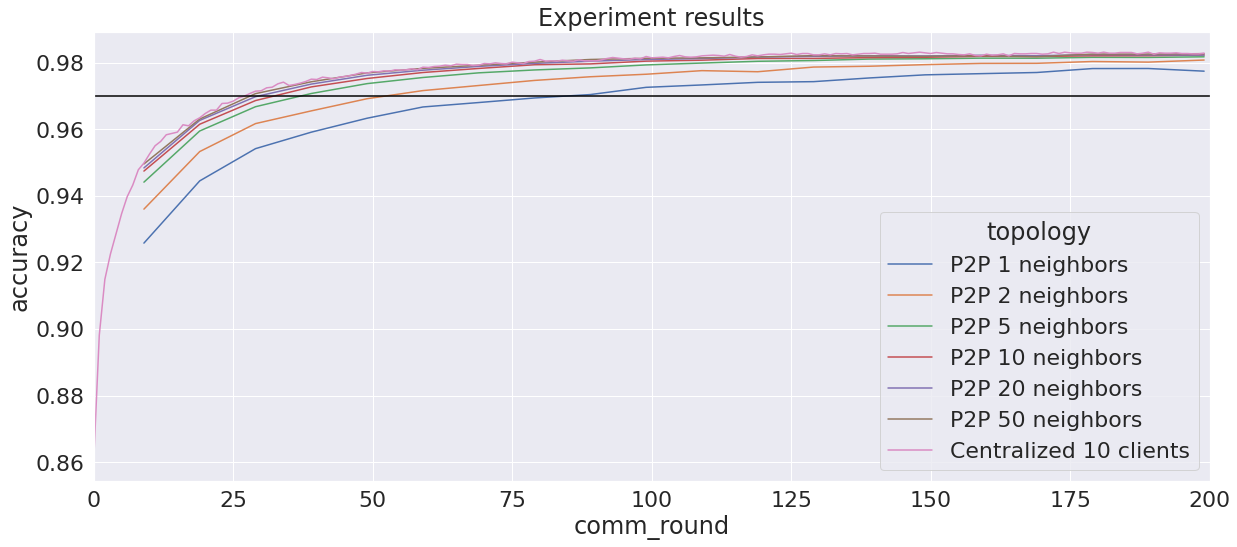

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import matplotlib.ticker as ticker
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(20,8.27)})
sns.set(font_scale=2)  # crazy big

### OPEN P2P
C_all=[1, 2, 5, 10, 20, 50]
dfs = []
for C in C_all:
    nr_clients = 100 ### NUMBER OF CLIENTS/ENTITIES
    client_epochs = 1   # Number of client epochs
    communication_rounds = 200  # Number of maximum communication rounds
    test_every_x_round = 10

    dir_str = '{}_{}_{}_{}_{}/'.format(nr_clients, C, client_epochs, communication_rounds, test_every_x_round)
    path = './Results/P2P_iid_colab/' + dir_str

    with open(path + 'metrics', 'rb') as metrics_file:
        metrics_p2p = pickle.load(metrics_file)

    # per node communication
    # C*nr_clients*round

    avgs =  [calc_avg_clients_metrics(metrics_p2p[0][i]) for i in range(communication_rounds//test_every_x_round)]
    df_p2p = pd.DataFrame(avgs)
    comm_round = [i-1 for i in range(10,210,10)]
    sent_models_per_client = [C*i for i in range(10, 210, 10)]
    # neighbors * communication_round/epoch

    # 0 indexed
    df_p2p['comm_round'] = comm_round
    df_p2p['sent_models_per_client'] = sent_models_per_client
    df_p2p['network_load'] = [i*nr_clients*C for i in range(10, 210, 10)]
    # change columns to match centralized
    df_p2p.columns = ['accuracy', 'precision', 'recall', 'f1','loss', 'comm_round', 'sent_models_per_client', 'network_load']
    dfs.append(df_p2p.assign(topology="P2P {} neighbors".format(C)))

### OPEN CENTRALIZED
nr_clients = 100 ### NUMBER OF CLIENTS/ENTITIES
C = 100  ### number of clients in each round, [1, nr_clients]
client_epochs = 1   # Number of client epochs
communication_rounds = 200  # Number of maximum communication rounds
test_every_x_round = 1

dir_str = '{}_{}_{}_{}_{}/'.format(nr_clients, C, client_epochs, communication_rounds, test_every_x_round)
path = './Results/Fedavg_iid_colab/' + dir_str

with open(path + 'metrics', 'rb') as metrics_file:
    metrics = pickle.load(metrics_file)

df = pd.DataFrame.from_dict(metrics[0])
df.drop(columns=["classification_report"])
df["comm_round"] = [i for i in range(200)]
df['sent_models_per_client'] = [i+1 for i in range(200)]
df['network_load'] = [(i+1)*20 for i in range(200)]

dfs.append(df.assign(topology='Centralized 10 clients'))

concatenated = pd.concat(dfs)
graph = sns.lineplot(x="comm_round", y="accuracy", hue="topology", data=concatenated)
graph.axhline(0.97, color='black')
plt.xlim(0, 200)
#graph.xaxis.set_major_locator(ticker.MultipleLocator(2500))
graph.set_title('Experiment results')
#graph.xaxis.set_major_formatter(ticker.ScalarFormatter())


{'neighbors': [1, 2, 5, 10, 20, 50], 'sent_models_per_client': [90, 120, 200, 400, 800, 1500], 'network_load': [9000, 12000, 20000, 40000, 80000, 150000], 'comm_round': [90, 60, 40, 40, 40, 30]}


Text(0.5, 1.0, 'Reached average 97% f1score P2P models non-IID')

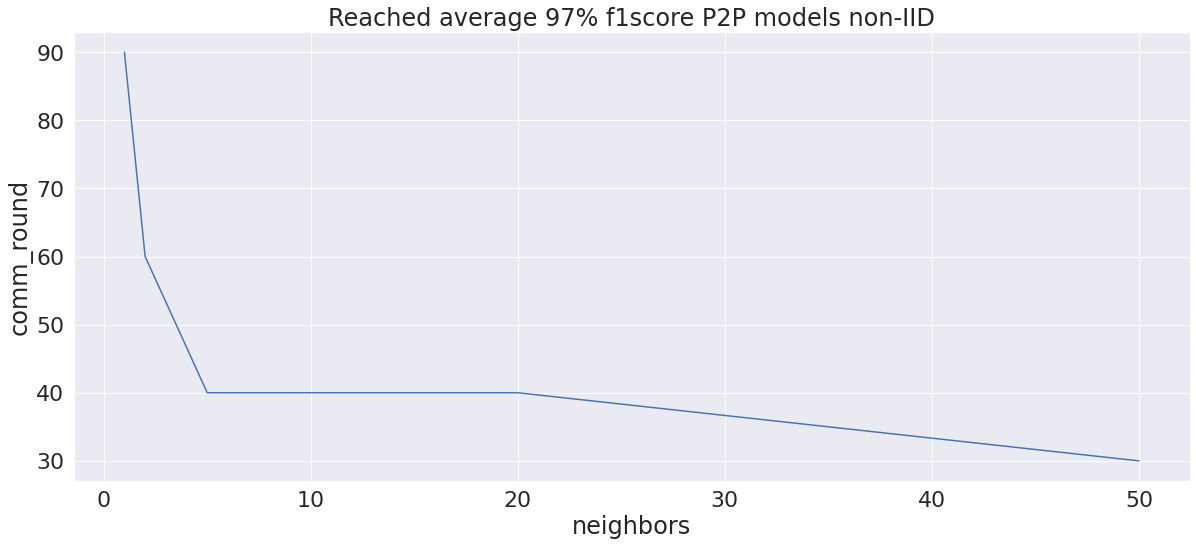

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
#sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(20,8.27)})
sns.set(font_scale=2)  # *crazy big

### OPEN P2P
C_all=[1, 2, 5, 10, 20, 50]
dfs = []

# Key: C
# Value: per client communication
# when reached 97%
reach_threshhold = {'neighbors': [], 'sent_models_per_client': [], 'network_load': [], 'comm_round': []}
for C in C_all:
    nr_clients = 100 ### NUMBER OF CLIENTS/ENTITIES
    client_epochs = 1   # Number of client epochs
    communication_rounds = 200  # Number of maximum communication rounds
    test_every_x_round = 10

    dir_str = '{}_{}_{}_{}_{}/'.format(nr_clients, C, client_epochs, communication_rounds, test_every_x_round)
    path = './Results/P2P_iid_colab/' + dir_str

    with open(path + 'metrics', 'rb') as metrics_file:
        metrics_p2p = pickle.load(metrics_file)

    # per node communication
    # C*nr_clients*round

    avgs =  [calc_avg_clients_metrics(metrics_p2p[0][i]) for i in range(communication_rounds//test_every_x_round)]

    # Find when acc bigger than 97%
    for i, test_round in enumerate(avgs):
        if test_round['average_fscore'] >= 0.97:
            reach_threshhold['neighbors'].append(C)
            reach_threshhold['sent_models_per_client'].append((i+1)*test_every_x_round*C)
            reach_threshhold['comm_round'].append((i+1)*test_every_x_round)
            reach_threshhold['network_load'].append((i+1)* test_every_x_round*nr_clients*C)
            break

print(reach_threshhold)
df = pd.DataFrame(reach_threshhold)
graph = sns.lineplot(x="neighbors", y="comm_round", data=df)
graph.set_title("Reached average 97% f1score P2P models IID")

In [ ]:
# systemtid MB, sekunder x axel, neighbors y axel, 
# tid y axel, tid att träna x axel, heatmap X.
# probability interval
# credible interval

Text(0.5, 1.0, 'Experiment results')

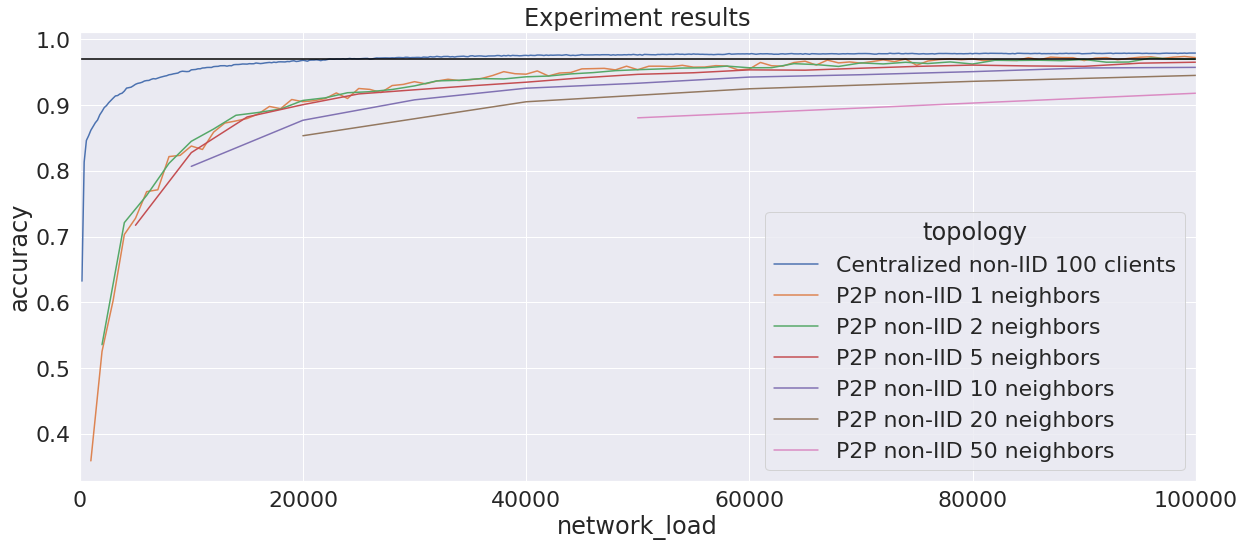

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import matplotlib.ticker as ticker
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(20,8.27)})
sns.set(font_scale=2)

C_all=[100]#, 20, 50, 100]
dfs = []
for C in C_all:
    nr_clients = 100 ### NUMBER OF CLIENTS/ENTITIES
    client_epochs = 1   # Number of client epochs
    communication_rounds = 1000  # Number of maximum communication rounds
    test_every_x_round = 1

    dir_str = '{}_{}_{}_{}_{}/'.format(nr_clients, C, client_epochs, communication_rounds, test_every_x_round)
    path = './Results/Fedavg_non_iid/' + dir_str

    with open(path + 'metrics', 'rb') as metrics_file:
        metrics = pickle.load(metrics_file)

    df = pd.DataFrame.from_dict(metrics[0])
    df.drop(columns=["classification_report"])
    df["comm_round"] = [i for i in range(communication_rounds)]
    df['sent_models_per_client'] = [i+1 for i in range(communication_rounds)]
    df['network_load'] = [(i+1)*(C*2) for i in range(communication_rounds)]

    dfs.append(df.assign(topology="Centralized non-IID {} clients".format(C)))

### OPEN P2P
C_all=[1, 2, 5, 10, 20, 50]
for C in C_all:
    nr_clients = 100 ### NUMBER OF CLIENTS/ENTITIES
    client_epochs = 1   # Number of client epochs
    communication_rounds = 1000  # Number of maximum communication rounds
    test_every_x_round = 10

    dir_str = '{}_{}_{}_{}_{}/'.format(nr_clients, C, client_epochs, communication_rounds, test_every_x_round)
    path = './Results/P2P_non_iid/' + dir_str

    with open(path + 'metrics', 'rb') as metrics_file:
        metrics_p2p = pickle.load(metrics_file)

    # per node communication
    # C*nr_clients*round

    avgs =  [calc_avg_clients_metrics(metrics_p2p[0][i]) for i in range(communication_rounds//test_every_x_round)]
    df_p2p = pd.DataFrame(avgs)
    comm_round = [i-1 for i in range(10,communication_rounds+10,10)]
    sent_models_per_client = [C*i for i in range(10, communication_rounds+10, 10)]
    # neighbors * communication_round/epoch

    # 0 indexed
    df_p2p['comm_round'] = comm_round
    df_p2p['sent_models_per_client'] = sent_models_per_client
    df_p2p['network_load'] = [i*nr_clients*C for i in range(10, communication_rounds+10, 10)]
    # change columns to match centralized
    df_p2p.columns = ['accuracy', 'precision', 'recall', 'f1','loss', 'comm_round', 'sent_models_per_client', 'network_load']
    dfs.append(df_p2p.assign(topology="P2P non-IID {} neighbors".format(C)))

concatenated = pd.concat(dfs)
graph = sns.lineplot(x="network_load", y="accuracy", hue="topology", data=concatenated)
graph.axhline(0.97, color='black')
plt.xlim(0, 100000)
#graph.xaxis.set_major_locator(ticker.MultipleLocator(2500))
graph.set_title('Experiment results')
#graph.xaxis.set_major_formatter(ticker.ScalarFormatter())

# Fedavg IID and non IID

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import matplotlib.ticker as ticker
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(20,8.27)})
sns.set(font_scale=2)

C_all=[1, 10, 20, 50, 100]

dfs = []
for C in C_all:
    nr_clients = 100 ### NUMBER OF CLIENTS/ENTITIES
    client_epochs = 1   # Number of client epochs
    communication_rounds = 200  # Number of maximum communication rounds
    test_every_x_round = 1

    dir_str = '{}_{}_{}_{}_{}/'.format(nr_clients, C, client_epochs, communication_rounds, test_every_x_round)
    path = './Results/Fedavg_iid/' + dir_str

    with open(path + 'metrics', 'rb') as metrics_file:
        metrics = pickle.load(metrics_file)

    df = pd.DataFrame.from_dict(metrics[0])
    df.drop(columns=["classification_report"])
    make_monotonic('accuracy', df)
    df["comm_round"] = [i for i in range(communication_rounds)]
    df['sent_models_per_client'] = [i+1 for i in range(communication_rounds)]
    df['network_load'] = [(i+1)*(C*2) for i in range(communication_rounds)]
    dfs.append(df.assign(Clients="C={}".format(C)))

concatenated = pd.concat(dfs)
fig, ax = plt.subplots(1,2)
graph = sns.lineplot(x="comm_round", y="accuracy", hue="Clients", data=concatenated, ax=ax[0])
graph.axhline(0.97, color='black')
ax[0].set_xlim(0, 200)
ax[0].set_ylim(0.93, 0.99)
graph.xaxis.set_major_locator(ticker.MultipleLocator(20))
graph.set_title('Fedavg IID, E=1')
graph.set_xlabel('Communication rounds')
graph.set_ylabel('Test Accuracy')


dfs = []
for C in C_all:
    nr_clients = 100 ### NUMBER OF CLIENTS/ENTITIES
    client_epochs = 1   # Number of client epochs
    communication_rounds = 1000  # Number of maximum communication rounds
    test_every_x_round = 1

    dir_str = '{}_{}_{}_{}_{}/'.format(nr_clients, C, client_epochs, communication_rounds, test_every_x_round)
    path = './Results/Fedavg_non_iid/' + dir_str

    with open(path + 'metrics', 'rb') as metrics_file:
        metrics = pickle.load(metrics_file)

    df = pd.DataFrame.from_dict(metrics[0])
    df.drop(columns=["classification_report"])
    make_monotonic('accuracy', df)
    df["comm_round"] = [i for i in range(communication_rounds)]
    df['sent_models_per_client'] = [i+1 for i in range(communication_rounds)]
    df['network_load'] = [(i+1)*(C*2) for i in range(communication_rounds)]
    dfs.append(df.assign(Clients="C={}".format(C)))

concatenated = pd.concat(dfs)
graph = sns.lineplot(x="comm_round", y="accuracy", hue="Clients", data=concatenated, ax=ax[1])
graph.axhline(0.97, color='black')
plt.xlim(0, 1000)
plt.ylim(0.93, 0.99)
graph.xaxis.set_major_locator(ticker.MultipleLocator(100))
graph.set_title('Fedavg non-IID, E=1')
graph.set_xlabel('Communication rounds')
graph.set_ylabel('Test Accuracy')

# Remove legend
handles, labels = graph.get_legend_handles_labels()
graph.legend(handles=handles[:], labels=labels[:])
#graph.xaxis.set_major_formatter(ticker.ScalarFormatter())
fig.savefig("FedavgC.png")

FileNotFoundError: [Errno 2] No such file or directory: './Results/Fedavg_iid/100_1_1_200_1/metrics'

In [24]:
dfs

[     accuracy        f1  precision    recall  \
 0      0.3270  0.195596   0.224332  0.323856   
 1      0.6377  0.565024   0.522644  0.631447   
 2      0.6437  0.609658   0.692353  0.639975   
 3      0.6920  0.648887   0.777901  0.690129   
 4      0.5335  0.484038   0.683272  0.535009   
 ..        ...       ...        ...       ...   
 995    0.9824  0.982282   0.982457  0.982164   
 996    0.9826  0.982493   0.982621  0.982401   
 997    0.9817  0.981578   0.981619  0.981552   
 998    0.9819  0.981774   0.981836  0.981738   
 999    0.9822  0.982083   0.982158  0.982032   
 
                                  classification_report      loss  comm_round  \
 0    {'0.0': {'precision': 0.2566929133858268, 'rec...  2.058626           0   
 1    {'0.0': {'precision': 0.9038901601830663, 'rec...  1.630846           1   
 2    {'0.0': {'precision': 0.7823479005998286, 'rec...  1.277305           2   
 3    {'0.0': {'precision': 0.982532751091703, 'reca...  1.216803           3   
 4   

In [40]:
def make_monotonic(column_name, df):
    prev = df.loc[0, (column_name)]
    for i in range(1, len(df[column_name])):
        curr = df.loc[i, (column_name)]
        if curr < prev:
            df.loc[i, (column_name)] = prev
        prev = df.loc[i, (column_name)]



In [38]:
dfs[0].loc[0, ('accuracy')]

2.0

In [37]:
len(dfs[0]['accuracy'])

1000